In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [76]:
from sklearn.model_selection import GridSearchCV 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 


In [77]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

# Inportantion des datas

In [136]:
df_train=pd.read_csv('Cardiaque_train.csv')

In [137]:
df_val=pd.read_csv('Cardiaque_test.csv')

In [138]:
df_val=df_val.set_index('trustii_id')

# Preprocessing

In [139]:
df_val

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
trustii_id,,,,,,,,,,,,
1,58.0,0.0,144.0,1.0,38.0,1.0,327000.00,0.70,142.0,0.0,0.0,83.0
2,50.0,1.0,249.0,1.0,35.0,1.0,319000.00,1.00,128.0,0.0,0.0,28.0
3,60.0,0.0,166.0,0.0,30.0,0.0,62000.00,1.70,127.0,0.0,0.0,207.0
4,60.0,0.0,235.0,1.0,38.0,0.0,329000.00,3.00,142.0,0.0,0.0,30.0
5,86.0,0.0,582.0,0.0,38.0,0.0,263358.03,1.83,134.0,0.0,0.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86,85.0,0.0,5882.0,0.0,35.0,0.0,243000.00,1.00,132.0,1.0,1.0,72.0
87,55.0,0.0,572.0,1.0,35.0,0.0,231000.00,0.80,143.0,0.0,0.0,215.0
88,50.0,1.0,582.0,1.0,20.0,1.0,279000.00,1.00,134.0,0.0,0.0,186.0


In [7]:
corr=df_train.loc[:,:].corr()

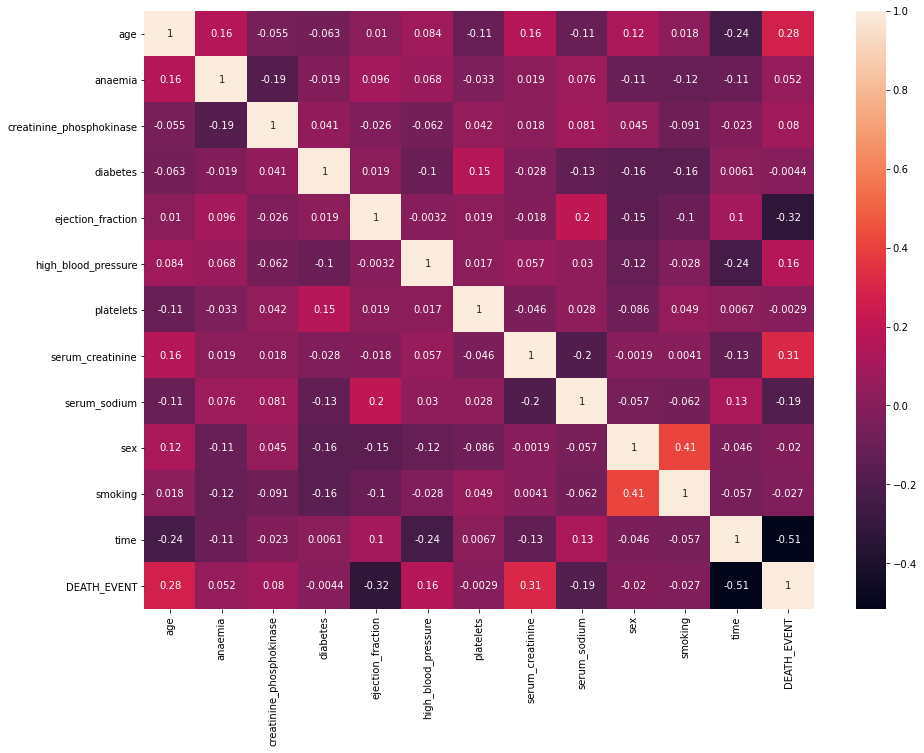

In [8]:
plt.figure(figsize=(15,11))

sns.heatmap(corr, 
xticklabels=corr.columns, 
yticklabels=corr . columns, annot=True)
plt.show()

### On cherche a voir l'impacte des variables categorielles sur notre variable de prediction DEATH_EVENT

Ces variables categorielles sont: anaemia,high_blood_pressure,smoking,diabetes,sex

In [7]:
liste=['high_blood_pressure','anaemia','smoking','diabetes','sex']

In [9]:
def catego(liste):
    for col in liste:
        print(df_train.groupby(col).mean()['DEATH_EVENT'])

In [9]:
catego(liste)

high_blood_pressure
0.0    0.266667
1.0    0.418919
Name: DEATH_EVENT, dtype: float64
anaemia
0.0    0.298246
1.0    0.347368
Name: DEATH_EVENT, dtype: float64
smoking
0.0    0.328767
1.0    0.301587
Name: DEATH_EVENT, dtype: float64
diabetes
0.0    0.322314
1.0    0.318182
Name: DEATH_EVENT, dtype: float64
sex
0.0    0.333333
1.0    0.313869
Name: DEATH_EVENT, dtype: float64


## Remarque

##### On remarque les variables 'smoking','diabetes','sex' sont imputables dans les données, vu qu'elles n'ont pas d'influence sur notre variable a predire.

In [141]:
df_train=df_train.drop(['smoking','diabetes','sex'],axis=1)

In [140]:
df_val=df_val.drop(['smoking','diabetes','sex'],axis=1)

In [218]:
df_train

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,73.0,0.0,582.0,20.0,0.0,263358.03,1.83,134.0,198.0,1
1,70.0,0.0,212.0,17.0,1.0,389000.00,1.00,136.0,188.0,0
2,60.0,1.0,737.0,60.0,1.0,210000.00,1.50,135.0,95.0,0
3,45.0,0.0,615.0,55.0,0.0,222000.00,0.80,141.0,257.0,0
4,55.0,0.0,748.0,45.0,0.0,263000.00,1.30,137.0,88.0,0
...,...,...,...,...,...,...,...,...,...,...
204,44.0,0.0,84.0,40.0,1.0,235000.00,0.70,139.0,79.0,0
205,46.0,0.0,719.0,40.0,1.0,263358.03,1.18,137.0,107.0,0
206,60.0,0.0,68.0,20.0,0.0,119000.00,2.90,127.0,64.0,1
207,53.0,1.0,91.0,20.0,1.0,418000.00,1.40,139.0,43.0,1


In [219]:
df_val

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
trustii_id,,,,,,,,,,
1,58.0,0.0,144.0,38.0,1.0,327000.00,0.70,142.0,83.0,0
2,50.0,1.0,249.0,35.0,1.0,319000.00,1.00,128.0,28.0,1
3,60.0,0.0,166.0,30.0,0.0,62000.00,1.70,127.0,207.0,1
4,60.0,0.0,235.0,38.0,0.0,329000.00,3.00,142.0,30.0,1
5,86.0,0.0,582.0,38.0,0.0,263358.03,1.83,134.0,95.0,1
...,...,...,...,...,...,...,...,...,...,...
86,85.0,0.0,5882.0,35.0,0.0,243000.00,1.00,132.0,72.0,1
87,55.0,0.0,572.0,35.0,0.0,231000.00,0.80,143.0,215.0,0
88,50.0,1.0,582.0,20.0,1.0,279000.00,1.00,134.0,186.0,1


In [55]:
df_train=pd.DataFrame(scaler.fit_transform(df_train.values),columns=df_train.columns)

In [285]:
df_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0.0,582.0,0.0,20.0,0.0,1.83,134.0,1.0,0.0,198.0,1
1,70.0,0.0,212.0,1.0,17.0,1.0,1.00,136.0,1.0,1.0,188.0,0
2,60.0,1.0,737.0,0.0,60.0,1.0,1.50,135.0,1.0,1.0,95.0,0
3,45.0,0.0,615.0,1.0,55.0,0.0,0.80,141.0,0.0,0.0,257.0,0
4,55.0,0.0,748.0,0.0,45.0,0.0,1.30,137.0,1.0,0.0,88.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
204,44.0,0.0,84.0,1.0,40.0,1.0,0.70,139.0,1.0,0.0,79.0,0
205,46.0,0.0,719.0,0.0,40.0,1.0,1.18,137.0,0.0,0.0,107.0,0
206,60.0,0.0,68.0,0.0,20.0,0.0,2.90,127.0,1.0,1.0,64.0,1
207,53.0,1.0,91.0,0.0,20.0,1.0,1.40,139.0,0.0,0.0,43.0,1


## Choix du Modele: L'objectif de cette partie est de voir quel est le modele qui convient à ces données

In [109]:
modele=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),SGDClassifier(),LogisticRegression()]

In [143]:
X_train=df_train.iloc[:,0:-1]
Y_train=df_train['DEATH_EVENT'].values

In [144]:
percentage_donnees_test = 0.2
X, X_VAL, Y, Y_VAL=train_test_split(X_train,Y_train, test_size=percentage_donnees_test)

## Nous utilisons une fonction pour tester la plupart des modeles de classification sur nos données

In [145]:
def model_train(liste):
    dt={}
    for model in liste:
        M=model
        M.fit(X,Y)
        pred=M.predict(X_VAL)
        dt[M]=accuracy_score(pred,Y_VAL)
        
    return dt

In [146]:
model_train(modele)

{DecisionTreeClassifier(): 0.8095238095238095,
 KNeighborsClassifier(): 0.5238095238095238,
 RandomForestClassifier(): 0.8809523809523809,
 SVC(): 0.5,
 GradientBoostingClassifier(): 0.8571428571428571,
 SGDClassifier(): 0.5,
 LogisticRegression(): 0.8333333333333334}

## Nous remarquons que les modeles les plus performants sont: RandomForestClassifier,GradientBoostingClassifier,DecisionTreeClassifier. Nous pouvons donc les choisir pour mieux les entrainer.

# Calibrage des modeles

In [228]:
from sklearn.pipeline import make_pipeline
from joblib import dump,load

In [153]:
model=make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))

In [176]:
param={
    'sgdclassifier__penalty':['l1','l2']
}

In [177]:
grid=GridSearchCV(model,param_grid=param,cv=4)

In [179]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'sgdclassifier__penalty': ['l1', 'l2']})

In [180]:
grid.best_score_

0.7314949201741654

### RandomForestClassifier

In [147]:

random_forest = [{'n_estimators': range(100,200)},{'min_samples_split':range(2,50)},{'max_leaf_nodes':range(2,50)},{'min_samples_leaf':range(1,50)},{'max_features': ["auto", "sqrt", "log2"]},{'criterion':["gini", "entropy"]}]

In [332]:
?RandomForestClassifier

In [224]:
random_forest = [ {'n_estimators':np.arange(100,300)},{'min_samples_split' :range(2,100)},
          {'min_samples_leaf' : range(1,100)},{'max_leaf_nodes' :range(2,100)},{'max_features' : ["auto","sqrt", "log2"]}]

### Le deséquilibre entre les données doit etre pris en compte par le modele

In [223]:
print(df_train.groupby('DEATH_EVENT').size())

DEATH_EVENT
0    142
1     67
dtype: int64


In [175]:
randModel=GridSearchCV(RandomForestClassifier(class_weight={0:142}),random_forest,cv=5,verbose=True, n_jobs=-1)

In [203]:
randModel.fit(X_train,Y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight={0: 142}),
             n_jobs=-1,
             param_grid=[{'n_estimators': range(100, 200)},
                         {'min_samples_split': range(2, 50)},
                         {'max_leaf_nodes': range(2, 50)},
                         {'min_samples_leaf': range(1, 50)},
                         {'max_features': ['auto', 'sqrt', 'log2']},
                         {'criterion': ['gini', 'entropy']}],
             verbose=True)

In [204]:
randModel.best_score_

0.8140534262485482

In [215]:
randModel.best_params_

{'n_estimators': 123}

In [217]:
randModel.best_index_

23

In [ ]:
randModel.best_

In [206]:
randForest=randModel.best_estimator_

In [208]:
prediction=randForest.predict(df_val)

In [207]:
df_val=df_val.drop('DEATH_EVENT',axis=1)

In [212]:
df_val['DEATH_EVENT']=prediction

In [225]:
dump(randForest, "ModelCardiaqueBest1")

['ModelCardiaqueBest1.mod']

In [226]:
prediction

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [232]:
modele_rediction = load("ModelCardiaqueBest") 

In [234]:
modele_rediction

RandomForestClassifier(class_weight={0: 142}, n_estimators=123)

In [211]:
df_val.to_csv('my_submission2.csv',encoding='UTF-8')